### Training process

- Design model (input size, output size, forward pass)
- Construct loss and optimizer
- Training loop
  - forward pass: compute prediction
  - backward pass: gradients
  - update weights


### Import package


In [37]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Prepare data


In [38]:
# 會生成一組帶有回歸目標的資料點，這些資料點的特徵（X）和目標（Y）之間具有線性關係。
# n_samples: 要生成的資料點數目。
# n_features: 資料點的特徵數目。
# noise: 加入到目標值的高斯噪音的標準差。
# random_state: 隨機數種子，確保每次生成的資料相同。
X_numpy, Y_numpy = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(Y_numpy.astype(np.float32))
print(x)

# 這一步是為了確保目標張量y的形狀是(資料點數目, 1)。這是因為後續可能需要與特徵張量x進行操作，而形狀相同的張量才能進行元素級操作。
y = y.view(y.shape[0], 1)
print(y)

# n_samples表示資料點數目，n_features表示每個資料點的特徵數目。
n_samples, n_features = x.shape

tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156],
        [-0.6370],
        [-0.3968],
        [-1.1006],
        [ 0.9009],
        [-1.0999],
        [ 0.8280],
        [-0.0756],
        [-0.3522],
        [-0.6707],
        [-1.0730],
        [-0.3062],
        [ 2.1856],
        [ 0.8654],
        [ 0.1983],
        [-0.3841],
        [-0.6837],
        [ 0.0508],
        [ 0.5828],
        [ 1.2529],
        [-0.7544],
        [-0.3493],
        [-0.8876],
        [ 0.1866],
        [ 0.8762],
        [ 0.8390],
        [-0.5045],
        [-0.3439],
        [ 1.6925],
        [-2.3015],
        [ 0.9311],
        [ 2.1003],
        [ 1.4621],
        [-0.8452],
        [-0.8779],
        [-0.3224],
        [ 0.8851],
        [ 0.1600],
        [ 1.1316],
        [-0.3753],
        [ 0.5025],
        [-0.2089],
        [ 0.1202],
        [ 0.

### Model


In [39]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

### Loss and optimizer


In [40]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training loop


In [41]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # backward loss
    loss.backward()

    # update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch:{epoch+1}, loss = {loss.item():.4f}')

epoch:10, loss = 4379.1030
epoch:20, loss = 3268.8494
epoch:30, loss = 2465.0325
epoch:40, loss = 1882.4789
epoch:50, loss = 1459.8823
epoch:60, loss = 1153.0546
epoch:70, loss = 930.1011
epoch:80, loss = 767.9745
epoch:90, loss = 649.9991
epoch:100, loss = 564.0979


### Plot


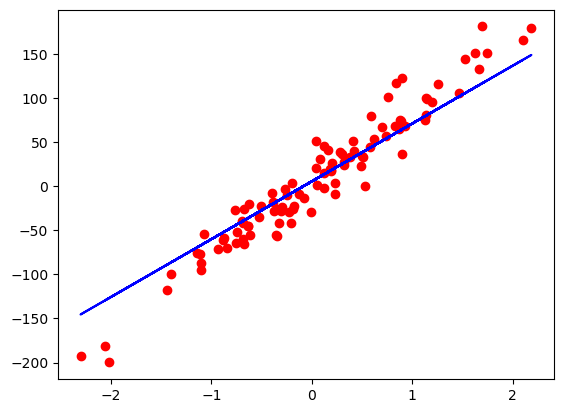

In [42]:
predicted = model(x).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, "b")
plt.show()